## DATA LOAD

In [453]:
import warnings 
warnings.filterwarnings('ignore')

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data = pd.read_csv("C:/damida/bigcontest_ensemble/preprocessing/bigcontest.csv")
data = pd.read_csv("C:/damida/bigcontest_ensemble/preprocessing/bigcontest.csv")

df= data.copy() #원본 둔 채 copydata 생성
df_copy = data.copy()

In [455]:
cthall = df[ df['place'] == '콘서트홀' ]
cthall # concerthall 에서 한 공연만 가지고 dataframe 생성

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


---
## 유료관객 전치리 및 EDA시각화

In [456]:
df_copy['price'] = df_copy['price'].replace(0,np.nan)
df_copy['price']

0           10000.0
1               NaN
2               NaN
3               NaN
4          180000.0
             ...   
1920863         NaN
1920864     21000.0
1920865     24000.0
1920866         NaN
1920867         NaN
Name: price, Length: 1920868, dtype: float64

#### 원하는 데이터 분류

In [457]:
cthall_unique = cthall[ (cthall['ticket_cancel']==0) ]

cthall = cthall[ (cthall['ticket_cancel']==0) & (cthall['price'] != 0) ]
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,0,일반,1528,NaN,20190413.0,클래식,콘서트홀,100,15,N
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.0,오페라,콘서트홀,120,15,Y
16,30.0,F,무료,그린,NaN,NaN,NaN,NaN,20230224,2214,...,0,일반,1684,20230218.0,20230219.0,합창,콘서트홀,100,15,Y
18,70.0,M,골드,무료,NaN,NaN,NaN,NaN,20191220,1106,...,0,골드회원 할인30%,76,20191220.0,20191223.0,클래식,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920834,30.0,F,무료,그린,NaN,NaN,NaN,NaN,20191206,1102,...,0,싹딜가(그린)50%,1170,20191101.0,20191104.0,교향곡,콘서트홀,120,15,Y
1920843,60.0,F,골드,무료,NaN,NaN,NaN,NaN,20181223,1227,...,0,일반,282,NaN,20181202.0,교향곡,콘서트홀,120,15,Y
1920849,30.0,F,무료,NaN,NaN,NaN,NaN,NaN,20230516,1743,...,0,일반,1666,20230317.0,20230318.0,실내악,콘서트홀,85,15,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y


### 전처리

#### 좌석전처리

In [458]:
cthall['floor'] = cthall['seat'].str.split(' ').str[0]
cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
cthall['col'] = cthall['seat'].str.split(' ').str[1].str[3:]

cthall_unique['floor'] = cthall_unique['seat'].str.split(' ').str[0]
cthall_unique['zone'] = cthall_unique['seat'].str.split(' ').str[1].str[:3]
cthall_unique['col'] = cthall_unique['seat'].str.split(' ').str[1].str[3:]

####  discount type 전처리

In [459]:
# discount_type 전처리
#새로운 column
# - column명 : discount
# - %앞의 숫자 : %앞의 수
# - 2+1 : -21
# - 결츨값 : -10
cthall['discount'] = cthall['discount_type'].str.extract('([0-9]+)\%')

cthall.loc[(~cthall['discount_type'].str.contains('%')) & (cthall['discount_type'].str.contains('특별할인')) & \
           (~(cthall['discount_type'].str.contains('기획사'))),'discount'] = -21

cthall['discount'] = cthall['discount'].fillna('-10')



cthall_unique['discount'] = cthall_unique['discount_type'].str.extract('([0-9]+)\%')

cthall_unique.loc[(~cthall_unique['discount_type'].str.contains('%')) & (cthall_unique['discount_type'].str.contains('특별할인')) & \
           (~(cthall_unique['discount_type'].str.contains('기획사'))),'discount'] = -21

cthall_unique['discount'] = cthall_unique['discount'].fillna('-10')

In [460]:
# discount를 사용하여 원가격복구
# - discount가 숫자
#   - 역수를 사용하여 원가격으로 복구
# - discount가 투플원
#   - 기존가격의 2/3 
cthall[cthall['discount']==-21][['performance_code','discount','price']].sort_values(['performance_code','price'])

cthall_unique[cthall_unique['discount']==-21][['performance_code','discount','price']].sort_values(['performance_code','price'])

,performance_code,discount,price
84003,1283,-21,25000
104192,1283,-21,25000
263957,1283,-21,25000
733908,1283,-21,25000
818118,1283,-21,25000
1014441,1283,-21,25000
1328036,1283,-21,25000
1544147,1283,-21,25000
1546098,1283,-21,25000
1705943,1283,-21,25000


In [384]:
# 원가격 복구를 위한 함수
from fractions import Fraction # 분수 표현식
import numpy as np
def ori_price(df):
    if df["discount"] == -10:
        return df['price']
    elif df["discount"] == -21:
        return df['price'] * float(Fraction(2, 3))
    else:
        return df['price'] *np.reciprocal(1-(int(df["discount"])/100))

In [461]:
#원가격복구
cthall['ori_price'] = cthall.apply(ori_price , axis=1)

#원가격복구
cthall_unique['ori_price'] = cthall_unique.apply(ori_price , axis=1)

In [462]:
cthall_unique

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,genre,place,running_time,intermission,member_yn,floor,zone,col,discount,ori_price
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,독주,콘서트홀,90,0,Y,1층,B블록,12열,-10,163636.363636
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,교향곡,콘서트홀,100,15,N,3층,E블록,4열,-10,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,교향곡,콘서트홀,120,20,N,2층,D블록,8열,-10,0.000000
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,클래식,콘서트홀,100,15,N,1층,C블록,17열,-10,68181.818182
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,오페라,콘서트홀,120,15,Y,3층,BOX,9,20,30000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,...,클래식,콘서트홀,120,15,N,합창석,G블록,4열,-10,0.000000
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,교향곡,콘서트홀,120,15,Y,3층,A블록,6열,-10,9090.909091
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,클래식,콘서트홀,120,15,N,1층,D블록,16열,-10,0.000000
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,합창,콘서트홀,110,15,N,1층,D블록,20열,-10,0.000000


#### covid season 전처리

In [463]:
# 코로나시즌 나누기

def covid_sep(df):
    if 20200816<= df["tran_date"] <= 20220418 :
        return 1
    else:
        return 0

cthall['covid_sep'] = cthall.apply(covid_sep, axis=1)
# cthall_unique['covid_sep'] = cthall_unique.apply(covid_sep, axis=1)

#### 날짜 데이터 전처리

In [464]:
# datetype 변경

cthall['tran_date'] = pd.to_datetime(cthall['tran_date'],format='%Y%m%d')
cthall['pre_open_date'] = pd.to_datetime(cthall['pre_open_date'],format='%Y%m%d')
cthall['open_date'] = pd.to_datetime(cthall['open_date'],format='%Y%m%d')


# datetype 변경

cthall_unique['tran_date'] = pd.to_datetime(cthall_unique['tran_date'],format='%Y%m%d')
cthall_unique['pre_open_date'] = pd.to_datetime(cthall_unique['pre_open_date'],format='%Y%m%d')
cthall_unique['open_date'] = pd.to_datetime(cthall_unique['open_date'],format='%Y%m%d')

In [470]:
# cthall = cthall.drop(['age', 'gender','membership_type_1', 'membership_type_2','membership_type_3',\
#                       'membership_type_4','membership_type_5', 'membership_type_6','ticket_cancel',\
#                       'discount_type','place','intermission', 'discount'], axis=1)
# #ticket_cancel과 discount_type은 원데이터 전처리에서 컬럼제거를 할 것인가?


# # cthall_unique = cthall_unique.drop(['membership_type_1', 'membership_type_2','membership_type_3',\
# #                       'membership_type_4','membership_type_5', 'membership_type_6','ticket_cancel',\
# #                       'discount_type','place','intermission', 'discount'], axis=1)
# # #ticket_cancel과 discount_type은 원데이터 전처리에서 컬럼제거를 할 것인가?

KeyError: "['age', 'gender', 'membership_type_1', 'membership_type_2', 'membership_type_3', 'membership_type_4', 'membership_type_5', 'membership_type_6', 'ticket_cancel', 'discount_type', 'place', 'intermission', 'discount'] not found in axis"

In [471]:
cthall.groupby('play_st_time').mean('ori_price')['ori_price']

play_st_time
1100    24377.580382
1400    63164.188772
1500    64644.778437
1630    53752.171395
1700    68574.523202
1800    40389.610390
1900    71705.096557
1930    76057.156851
2000    62708.017419
Name: ori_price, dtype: float64

---------
### 시간대

In [390]:
cthall_group_time_pf = cthall.groupby(['play_st_time','performance_code'],as_index=False).count()
cthall_group_time_pf

,play_st_time,performance_code,tran_date,tran_time,play_date,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep
0,1100,352,1111,1111,1111,1111,1111,1111,1111,0,1111,1111,1111,1111,1111,1111,1111
1,1100,353,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180,1180
2,1100,354,748,748,748,748,748,748,748,0,748,748,748,748,748,748,748
3,1100,1497,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498
4,1100,1498,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2000,2762,16,16,16,16,16,0,16,16,16,16,16,16,16,16,16
669,2000,2776,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18
670,2000,2791,41,41,41,41,41,0,41,41,41,41,41,41,41,41,41
671,2000,2920,390,390,390,390,390,0,390,390,390,390,390,390,390,390,390


#### 시간대별 공연

<Axes: xlabel='play_st_time', ylabel='performance_code'>

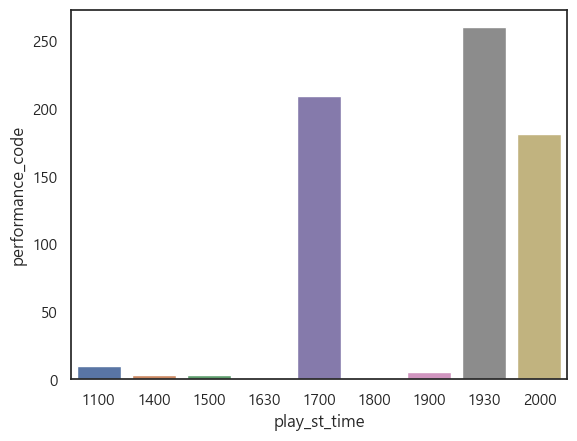

In [391]:
#시간대별 공연의 수
import seaborn as sns
sns.barplot(x = cthall_group_time_pf.groupby('play_st_time').count().index , y = cthall_group_time_pf.groupby('play_st_time').count()['performance_code'])

#### 시간대별 가격

In [392]:
cthall_group_time_pf_mean = cthall.groupby(['play_st_time','performance_code'],as_index=False).mean('ori_price')
cthall_group_time_pf_mean

,play_st_time,performance_code,tran_time,play_date,price,running_time,ori_price,covid_sep
0,1100,352,1437.335734,20230331.0,22119.711971,120.0,25805.981668,0.0
1,1100,353,1434.666102,20230505.0,22123.728814,120.0,24965.340343,0.0
2,1100,354,1408.691176,20230630.0,22176.470588,120.0,25451.285424,0.0
3,1100,1497,1449.234980,20230325.0,21843.124166,120.0,24150.948740,0.0
4,1100,1498,1447.041763,20230422.0,20574.245940,120.0,22390.820998,0.0
...,...,...,...,...,...,...,...,...
668,2000,2762,1197.500000,20190801.0,20187.500000,115.0,20738.636364,0.0
669,2000,2776,1434.055556,20190717.0,38055.555556,120.0,45404.040404,0.0
670,2000,2791,1372.024390,20220915.0,35682.926829,120.0,48780.487805,0.0
671,2000,2920,1422.907692,20190117.0,63348.717949,120.0,91393.939394,0.0


<Axes: xlabel='play_st_time', ylabel='ori_price'>

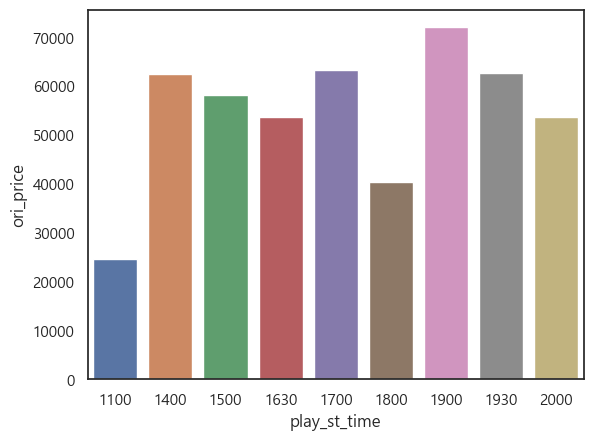

In [393]:
import seaborn as sns

#시간대별 가격
sns.barplot(x = cthall_group_time_pf_mean.groupby('play_st_time').mean('ori_price').index, y = cthall_group_time_pf_mean.groupby('play_st_time').mean('ori_price')['ori_price'])

#### 시간대별 관객

In [394]:
cthall_group_time_pf.groupby('play_st_time').count().index

Index([1100, 1400, 1500, 1630, 1700, 1800, 1900, 1930, 2000], dtype='int64', name='play_st_time')

<Axes: xlabel='play_st_time', ylabel='seat'>

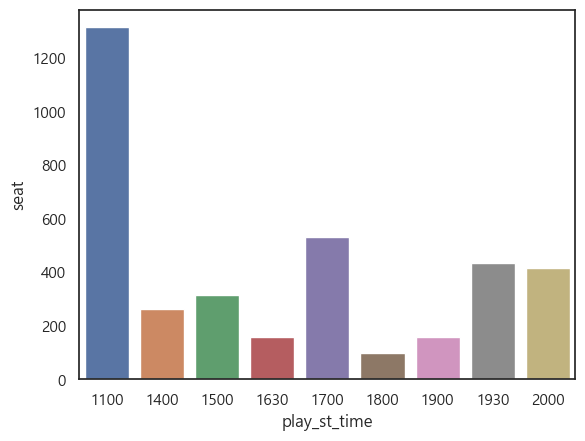

In [395]:
# 시간대별 관객, (not price zero)
sns.barplot(x = cthall_group_time_pf.groupby('play_st_time').mean('seat').index, y = cthall_group_time_pf.groupby('play_st_time').mean('seat')['seat'])

---
### 장르별

#### 장르별 공연

In [396]:
cthall_group_genre_pf = cthall.groupby(['genre','performance_code'],as_index=False).count()
cthall_group_genre_pf

,genre,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,running_time,member_yn,floor,zone,col,ori_price,covid_sep
0,가족극,1429,24,24,24,24,24,24,0,24,24,24,24,24,24,24,24
1,교향곡,7,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
2,교향곡,23,643,643,643,643,643,643,0,643,643,643,643,643,643,643,643
3,교향곡,44,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606
4,교향곡,68,450,450,450,450,450,450,450,450,450,450,450,450,450,450,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,합창,2640,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
642,합창,2641,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
643,합창,2642,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10
644,합창,2762,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16


In [397]:
cthall_group_genre_pf.groupby('genre').count()

,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,running_time,member_yn,floor,zone,col,ori_price,covid_sep
genre,,,,,,,,,,,,,,,,
가족극,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
교향곡,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317
기타,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
독주,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
복합장르,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
성악,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
실내악,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
오페라,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
재즈,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='genre', ylabel='performance_code'>

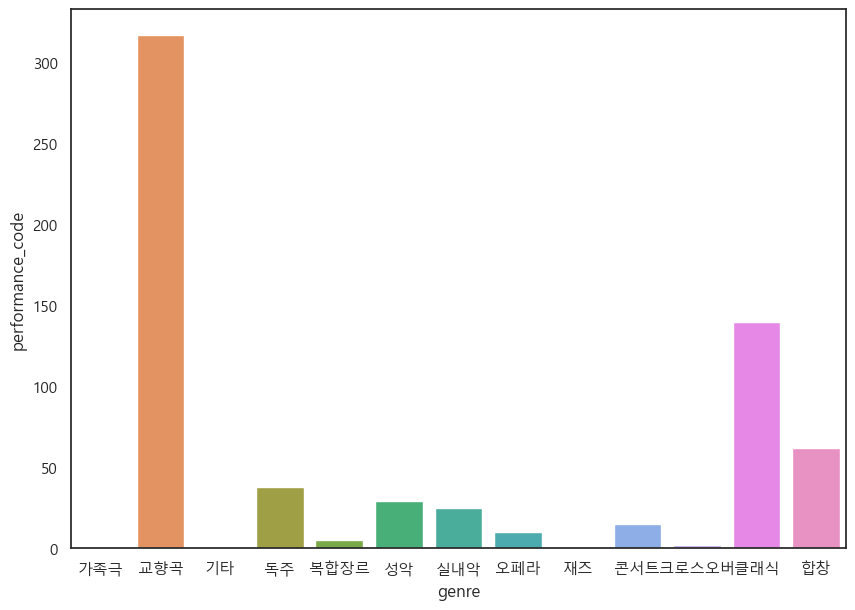

In [398]:
# 장르별 공연 수
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
plt.figure(figsize=(10, 7))

sns.barplot(x = cthall_group_genre_pf.groupby('genre').count().index , y = cthall_group_genre_pf.groupby('genre').count()['performance_code'])

#### 장르별 가격

In [399]:
cthall_group_genre_pf_mean = cthall.groupby(['genre','performance_code'],as_index=False).mean('ori_price')
cthall_group_genre_pf_mean

,genre,performance_code,tran_time,play_date,play_st_time,price,running_time,ori_price,covid_sep
0,가족극,1429,1352.041667,20210511.0,1930.0,53833.333333,110.0,66666.666667,1.0
1,교향곡,7,1445.652174,20210625.0,1930.0,29434.782609,100.0,39525.691700,1.0
2,교향곡,23,1500.670295,20191025.0,2000.0,32185.069984,120.0,32805.330873,0.0
3,교향곡,44,1124.552927,20191108.0,2000.0,248393.524284,100.0,286163.617717,0.0
4,교향곡,68,1322.082222,20190601.0,1700.0,64551.111111,150.0,82761.616162,0.0
...,...,...,...,...,...,...,...,...,...
641,합창,2640,1484.500000,20190319.0,2000.0,47500.000000,90.0,47272.727273,0.0
642,합창,2641,1247.000000,20190326.0,2000.0,30000.000000,110.0,50000.000000,0.0
643,합창,2642,1361.500000,20230411.0,1930.0,55400.000000,120.0,64818.181818,0.0
644,합창,2762,1197.500000,20190801.0,2000.0,20187.500000,115.0,20738.636364,0.0


<Axes: xlabel='genre', ylabel='ori_price'>

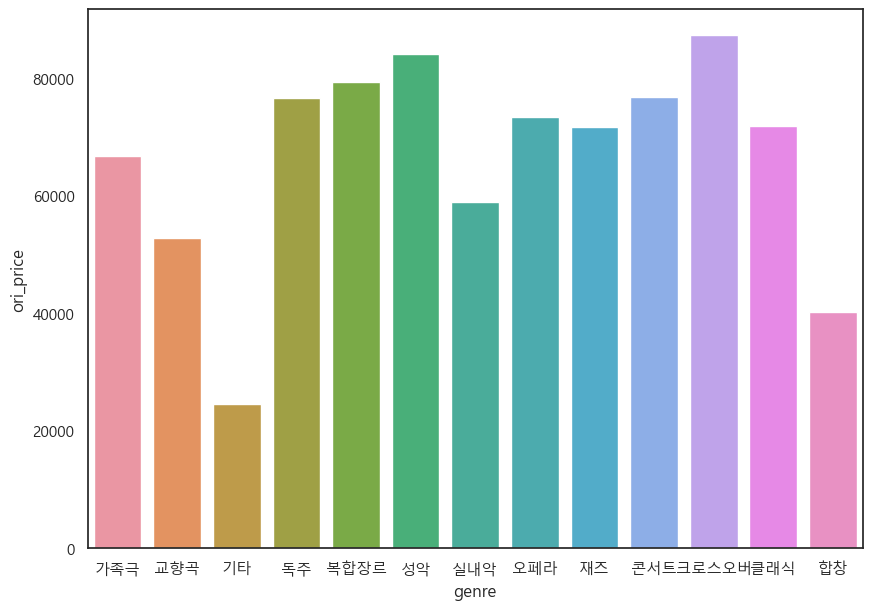

In [400]:
#장르별가격
plt.figure(figsize=(10, 7))
sns.barplot(x = cthall_group_genre_pf_mean.groupby('genre').mean('ori_price').index, y = cthall_group_genre_pf_mean.groupby('genre').mean('ori_price')['ori_price'])

#### 장르별 인기

<Axes: xlabel='genre', ylabel='seat'>

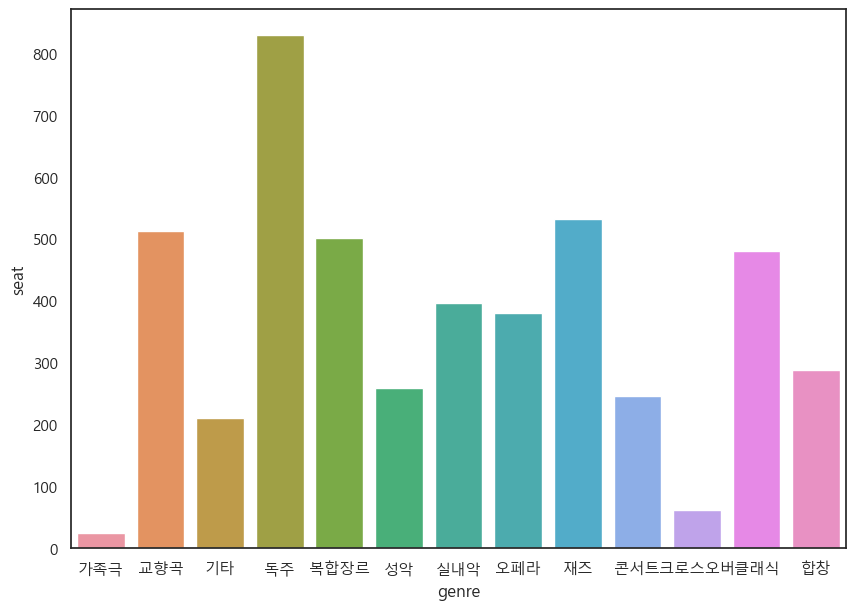

In [401]:
#인기있는 장르(장르별 평균관객, 코로나가 포함되어있음)

plt.figure(figsize=(10, 7))
sns.barplot(x = cthall_group_genre_pf.groupby('genre').mean().index , y = cthall_group_genre_pf.groupby('genre').mean()['seat'])

---
### 연,월

#### 데이터타입변한

In [402]:
cthall['play_date'] = pd.to_datetime(cthall['play_date'], format='%Y%m%d', errors='raise')

In [403]:
cthall['play_date_year'] = cthall['play_date'].dt.year
cthall['play_date_month'] = cthall['play_date'].dt.month
cthall['play_date_day'] = cthall['play_date'].dt.day

#### 연 월별 공연수

In [404]:
cthall_group_pdm_pf = cthall.groupby(['play_date_month','performance_code'],as_index=False).count()
cthall_group_pdm_pf

,play_date_month,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_year,play_date_day
0,1,142,625,625,625,625,625,625,0,625,625,625,625,625,625,625,625,625,625,625
1,1,219,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571,571
2,1,288,889,889,889,889,889,889,0,889,889,889,889,889,889,889,889,889,889,889
3,1,318,160,160,160,160,160,160,0,160,160,160,160,160,160,160,160,160,160,160
4,1,346,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,12,2766,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
662,12,2839,377,377,377,377,377,377,0,377,377,377,377,377,377,377,377,377,377,377
663,12,2840,218,218,218,218,218,218,0,218,218,218,218,218,218,218,218,218,218,218
664,12,2841,918,918,918,918,918,918,0,918,918,918,918,918,918,918,918,918,918,918


In [405]:
cthall_group_pdy_pf = cthall.groupby(['play_date_year','performance_code'],as_index=False).count()
cthall_group_pdy_pf.groupby('play_date_year').count()

,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_month,play_date_day
play_date_year,,,,,,,,,,,,,,,,,,,
2018,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2019,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
2020,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
2021,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
2022,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
2023,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108


In [406]:
cthall_group_pdm_pf.groupby('play_date_month').count()

,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_year,play_date_day
play_date_month,,,,,,,,,,,,,,,,,,,
1,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
3,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
5,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
6,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
7,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
8,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
9,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


<Axes: xlabel='play_date_year', ylabel='performance_code'>

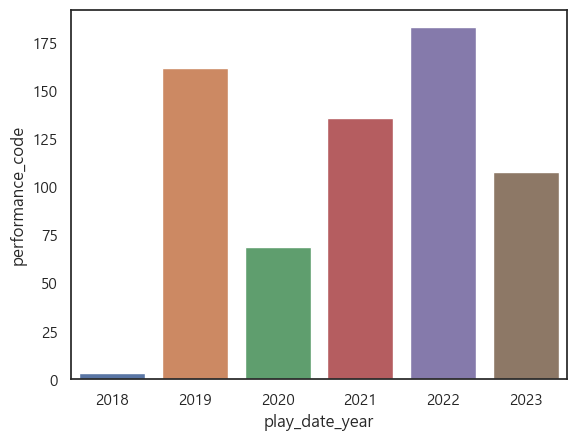

In [407]:
# 연도별 공연 수

sns.barplot(x = cthall_group_pdy_pf.groupby('play_date_year').count().index , y = cthall_group_pdy_pf.groupby('play_date_year').count()['performance_code'])

<Axes: xlabel='play_date_month', ylabel='performance_code'>

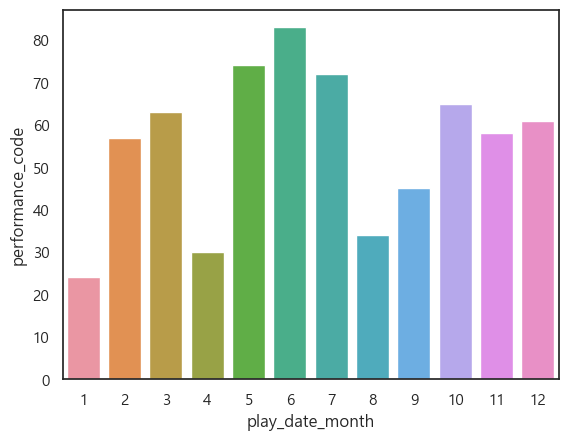

In [408]:
# 월별 공연 수
sns.barplot(x = cthall_group_pdm_pf.groupby('play_date_month').count().index , y = cthall_group_pdm_pf.groupby('play_date_month').count()['performance_code'])

In [409]:
cthall_group_pdm_pf_aud['play_date_month'] = cthall_group_pdm_pf_aud['play_date_month'].astype('str')

In [410]:
cthall_group_pdy_pf

,play_date_year,performance_code,tran_date,tran_time,play_date,play_st_time,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_month,play_date_day
0,2018,715,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
1,2018,1242,59,59,59,59,59,59,0,59,59,59,59,59,59,59,59,59,59,59
2,2018,1283,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
3,2019,7,18,18,18,18,18,18,0,18,18,18,18,18,18,18,18,18,18,18
4,2019,23,643,643,643,643,643,643,0,643,643,643,643,643,643,643,643,643,643,643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,2023,2833,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
657,2023,2834,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121
658,2023,2835,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912
659,2023,2836,659,659,659,659,659,659,659,659,659,659,659,659,659,659,659,659,659,659


#### 연 월 별 가격

In [411]:
cthall_group_pdy_pf_mean = cthall.groupby(['play_date_year','performance_code'],as_index=False).mean('ori_price')
cthall_group_pdy_pf_mean

,play_date_year,performance_code,tran_time,play_st_time,price,running_time,ori_price,covid_sep,play_date_month,play_date_day
0,2018,715,1397.604167,1700.0,52541.666667,120.0,57708.333333,0.0,11.0,25.0
1,2018,1242,1538.135593,1700.0,46508.474576,140.0,60015.408320,0.0,12.0,8.0
2,2018,1283,1425.649554,2000.0,22475.446429,120.0,28343.885281,0.0,12.0,18.0
3,2019,7,1685.055556,2000.0,23833.333333,100.0,30959.595960,0.0,8.0,30.0
4,2019,23,1500.670295,2000.0,32185.069984,120.0,32805.330873,0.0,10.0,25.0
...,...,...,...,...,...,...,...,...,...,...
656,2023,2833,1437.550149,1700.0,29491.559086,120.0,35675.777578,0.0,6.0,11.0
657,2023,2834,1460.811775,1930.0,29430.865299,120.0,35925.190934,0.0,6.0,21.0
658,2023,2835,1305.620614,1930.0,28521.929825,120.0,38744.429590,0.0,6.0,29.0
659,2023,2836,1464.009105,1930.0,27552.352049,120.0,35509.871544,0.0,6.0,9.0


In [412]:
cthall_group_pdm_pf_mean = cthall.groupby(['play_date_month','performance_code'],as_index=False).mean('ori_price')
cthall_group_pdm_pf_mean

,play_date_month,performance_code,tran_time,play_st_time,price,running_time,ori_price,covid_sep,play_date_year,play_date_day
0,1,142,1428.648000,1930.000000,85867.200000,85.0,86133.818182,0.0,2023.0,5.000000
1,1,219,1372.714536,1700.000000,84863.397548,100.0,96180.847757,0.0,2023.0,15.000000
2,1,288,1451.595051,2000.000000,49746.906637,120.0,50774.592171,0.0,2020.0,3.000000
3,1,318,1421.581250,1700.000000,53943.750000,120.0,59390.849282,1.0,2021.0,2.000000
4,1,346,1373.186111,1700.000000,30105.555556,110.0,36020.202020,0.0,2020.0,4.000000
...,...,...,...,...,...,...,...,...,...,...
661,12,2766,1317.163934,1700.000000,105573.770492,110.0,129538.002981,0.0,2019.0,21.000000
662,12,2839,1443.501326,1792.732095,30962.864721,70.0,35238.712606,1.0,2020.0,20.612732
663,12,2840,1454.633028,1930.000000,32591.743119,100.0,37948.682726,1.0,2021.0,14.000000
664,12,2841,1396.446623,1700.000000,31825.708061,120.0,35419.949204,0.0,2022.0,10.491285


In [413]:
cthall_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price')

,performance_code,tran_time,play_st_time,price,running_time,ori_price,covid_sep,play_date_month,play_date_day
play_date_year,,,,,,,,,
2018,1080.000000,1453.796438,1800.000000,40508.529224,126.666667,48689.208978,0.000000,11.666667,17.000000
2019,1326.734568,1399.960804,1890.257696,49294.842317,109.230865,57937.232789,0.000000,7.218646,15.634040
2020,1176.927536,1437.123613,1846.770260,42653.417742,113.913043,50262.374103,0.329717,6.309477,15.433792
2021,1185.117647,1452.590834,1872.505396,53961.617548,108.419118,62268.212392,1.000000,7.700798,15.287604
2022,1238.005464,1442.199992,1867.429024,56629.557669,109.297034,64704.274547,0.261394,7.434056,16.419192
2023,1488.490741,1426.029383,1788.055556,50946.826922,111.270091,58048.456599,0.000000,4.183176,15.204140


In [414]:
cthall_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price')

,performance_code,tran_time,play_st_time,price,running_time,ori_price,covid_sep,play_date_month,play_date_day
play_date_year,,,,,,,,,
2018,1080.000000,1453.796438,1800.000000,40508.529224,126.666667,48689.208978,0.000000,11.666667,17.000000
2019,1326.734568,1399.960804,1890.257696,49294.842317,109.230865,57937.232789,0.000000,7.218646,15.634040
2020,1176.927536,1437.123613,1846.770260,42653.417742,113.913043,50262.374103,0.329717,6.309477,15.433792
2021,1185.117647,1452.590834,1872.505396,53961.617548,108.419118,62268.212392,1.000000,7.700798,15.287604
2022,1238.005464,1442.199992,1867.429024,56629.557669,109.297034,64704.274547,0.261394,7.434056,16.419192
2023,1488.490741,1426.029383,1788.055556,50946.826922,111.270091,58048.456599,0.000000,4.183176,15.204140


<Axes: xlabel='play_date_year', ylabel='ori_price'>

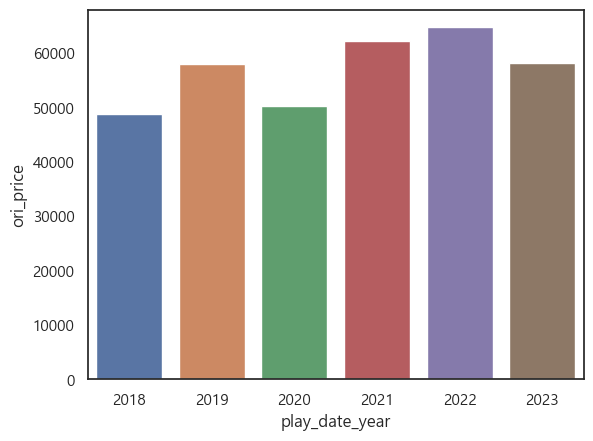

In [415]:
# 연도별 공연 평균가격
sns.barplot(x = cthall_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price').index , y = cthall_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price')['ori_price'])

<Axes: xlabel='play_date_month', ylabel='ori_price'>

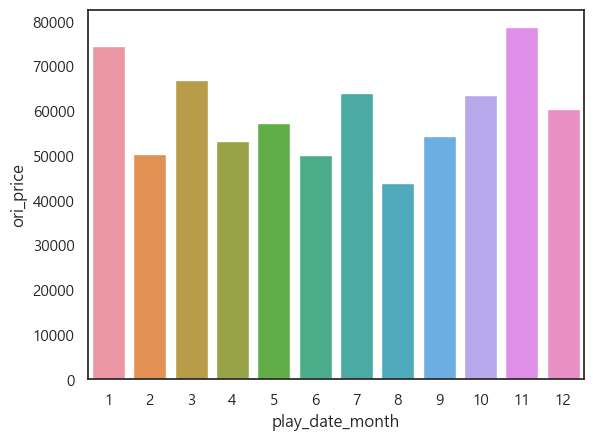

In [416]:
# 월별 공연 평균가격
# 공연코드와 한번 같이 보기
sns.barplot(x = cthall_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price').index , y = cthall_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price')['ori_price'])

#### 연 월 별 관객

In [417]:
cthall_group_pdy_pf_aud = cthall.groupby('play_date_year',as_index=False).count()
cthall_group_pdy_pf_aud

,play_date_year,tran_date,tran_time,play_date,play_st_time,seat,price,performance_code,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_month,play_date_day
0,2018,555,555,555,555,555,555,555,496,555,555,555,555,555,555,555,555,555,555,555
1,2019,71422,71422,71422,71422,71422,71422,71422,46891,71422,71422,71422,71422,71422,71422,71422,71422,71422,71422,71422
2,2020,19388,19388,19388,19388,19388,19388,19388,9619,19388,19388,19388,19388,19388,19388,19388,19388,19388,19388,19388
3,2021,49029,49029,49029,49029,49029,49029,49029,37003,49029,48513,49029,49029,49029,49029,49029,49029,49029,49029,49029
4,2022,89938,89938,89938,89938,89938,89938,89938,68244,89938,88839,89938,89938,89938,89938,89938,89938,89938,89938,89938
5,2023,84826,84826,84826,84826,84826,84826,84826,62386,84826,78379,84826,84826,84826,84826,84826,84826,84826,84826,84826


In [418]:
cthall_group_pdm_pf_aud = cthall.groupby('play_date_month',as_index=False).count()
cthall_group_pdm_pf_aud

,play_date_month,tran_date,tran_time,play_date,play_st_time,seat,price,performance_code,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_year,play_date_day
0,1,12727,12727,12727,12727,12727,12727,12727,5705,12727,12724,12727,12727,12727,12727,12727,12727,12727,12727,12727
1,2,22523,22523,22523,22523,22523,22523,22523,12858,22523,21839,22523,22523,22523,22523,22523,22523,22523,22523,22523
2,3,34365,34365,34365,34365,34365,34365,34365,25199,34365,31455,34365,34365,34365,34365,34365,34365,34365,34365,34365
3,4,13306,13306,13306,13306,13306,13306,13306,6747,13306,13306,13306,13306,13306,13306,13306,13306,13306,13306,13306
4,5,41968,41968,41968,41968,41968,41968,41968,31517,41968,40347,41968,41968,41968,41968,41968,41968,41968,41968,41968
5,6,45975,45975,45975,45975,45975,45975,45975,39768,45975,45227,45975,45975,45975,45975,45975,45975,45975,45975,45975
6,7,31617,31617,31617,31617,31617,31617,31617,24716,31617,29908,31617,31617,31617,31617,31617,31617,31617,31617,31617
7,8,11960,11960,11960,11960,11960,11960,11960,7857,11960,11960,11960,11960,11960,11960,11960,11960,11960,11960,11960
8,9,17812,17812,17812,17812,17812,17812,17812,12952,17812,17425,17812,17812,17812,17812,17812,17812,17812,17812,17812
9,10,23704,23704,23704,23704,23704,23704,23704,18784,23704,23704,23704,23704,23704,23704,23704,23704,23704,23704,23704


<Axes: xlabel='play_date_year', ylabel='seat'>

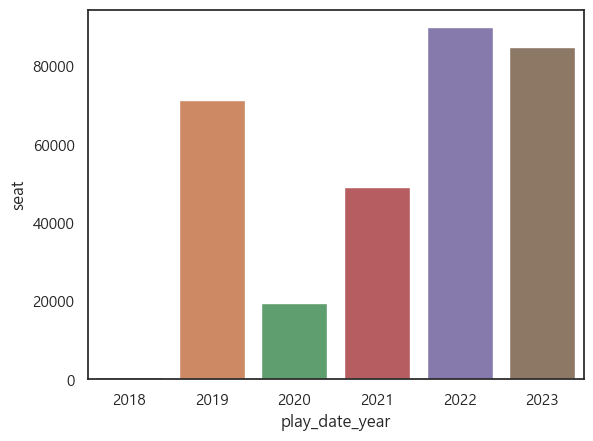

In [419]:
# 연도별 관객수
sns.barplot(x = cthall_group_pdy_pf_aud['play_date_year'] ,\
            y = cthall_group_pdy_pf_aud['seat'])

<Axes: xlabel='play_date_month', ylabel='seat'>

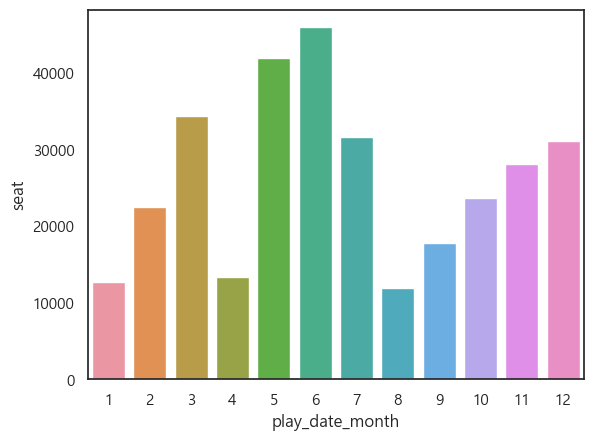

In [420]:
# 월별 관객수
sns.barplot(x = cthall_group_pdm_pf_aud['play_date_month'] , y = cthall_group_pdm_pf_aud['seat'])

---
### 코로나 시즌 비교

In [421]:
cthall_no_covid = cthall[cthall['covid_sep'] == 0]
cthall_covid = cthall[cthall['covid_sep'] == 1]

In [422]:
cthall_no_covid.head()

,tran_date,tran_time,play_date,play_st_time,seat,price,performance_code,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep,play_date_year,play_date_month,play_date_day
9,2019-07-03,908,2019-07-21,1700,1층 C블록17열 3,75000,1528,NaT,2019-04-13,클래식,100,N,1층,C블록,17열,68181.818182,0,2019,7,21
11,2019-10-05,1417,2019-12-01,1700,3층 BOX9 5,24000,315,NaT,2019-10-05,오페라,120,Y,3층,BOX,9,30000.000000,0,2019,12,1
16,2023-02-24,2214,2023-04-12,1930,1층 C블록2열 2,130000,1684,2023-02-18,2023-02-19,합창,100,Y,1층,C블록,2열,118181.818182,0,2023,4,12
18,2019-12-20,1106,2020-02-11,1930,2층 BOX2 2,42000,76,2019-12-20,2019-12-23,클래식,120,Y,2층,BOX,2,60000.000000,0,2020,2,11
28,2023-03-27,1601,2023-05-23,1930,1층 B블록21열 9,66000,221,2023-02-25,2023-02-26,클래식,150,Y,1층,B블록,21열,110000.000000,0,2023,5,23


In [423]:
cthall_nc_group_time_pf_mean = cthall_no_covid.groupby(['play_st_time','performance_code'],as_index=False).mean('ori_price')
cthall_c_group_time_pf_mean = cthall_covid.groupby(['play_st_time','performance_code'],as_index=False).mean('ori_price')

<Axes: xlabel='play_st_time', ylabel='ori_price'>

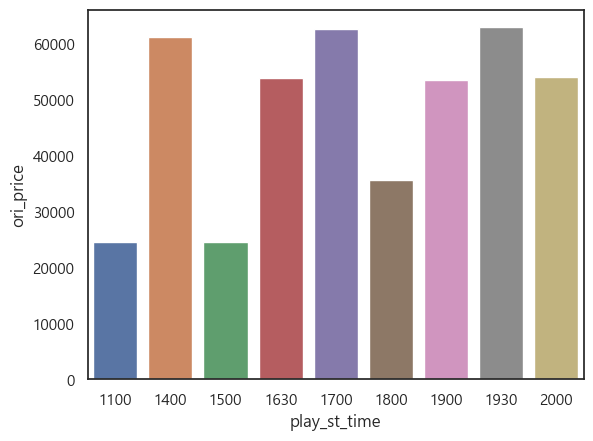

In [424]:
import seaborn as sns

#시간대별 가격
sns.barplot(x = cthall_nc_group_time_pf_mean.groupby('play_st_time').mean('ori_price').index, y = cthall_nc_group_time_pf_mean.groupby('play_st_time').mean('ori_price')['ori_price'])

<Axes: xlabel='play_st_time', ylabel='ori_price'>

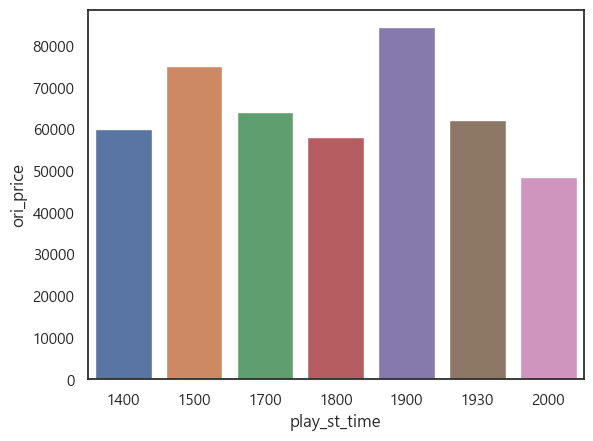

In [425]:
import seaborn as sns

#시간대별 가격
sns.barplot(x = cthall_c_group_time_pf_mean.groupby('play_st_time').mean('ori_price').index, y = cthall_c_group_time_pf_mean.groupby('play_st_time').mean('ori_price')['ori_price'])

Text(0.5, 1.0, 'covid season')

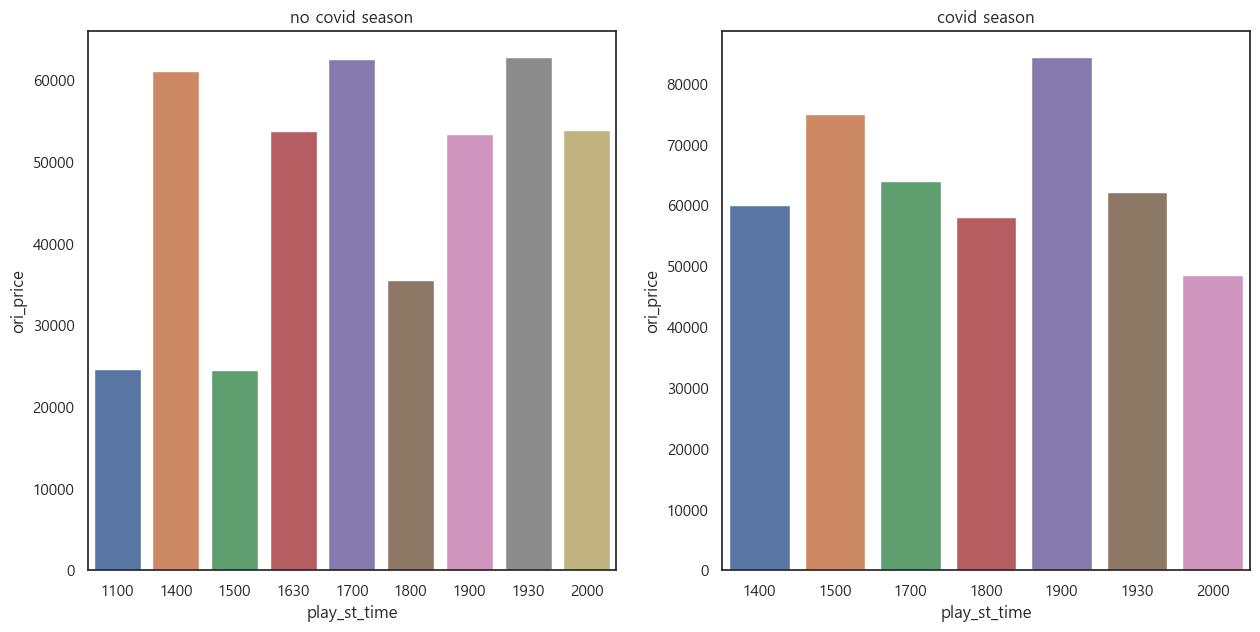

In [426]:
#covid 시즌 별 시간대별 공연가격

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

sns.barplot(x = cthall_nc_group_time_pf_mean.groupby('play_st_time').mean('ori_price').index,\
            y = cthall_nc_group_time_pf_mean.groupby('play_st_time').mean('ori_price')['ori_price']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_time_pf_mean.groupby('play_st_time').mean('ori_price').index,\
            y = cthall_c_group_time_pf_mean.groupby('play_st_time').mean('ori_price')['ori_price']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

In [427]:
cthall_nc_group_time_pf = cthall_no_covid.groupby(['play_st_time','performance_code'],as_index=False).count()
cthall_c_group_time_pf= cthall_covid.groupby(['play_st_time','performance_code'],as_index=False).count()

Text(0.5, 1.0, 'covid season')

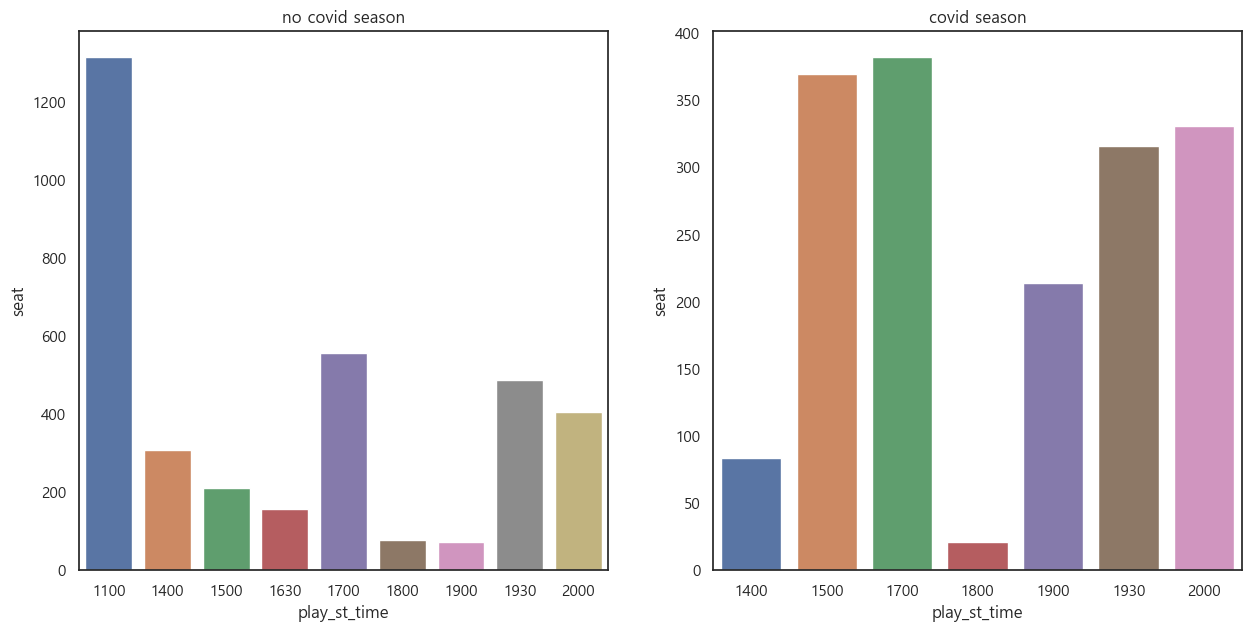

In [428]:
#covid 시즌 별 시간대별 공연별 평균관객

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

sns.barplot(x = cthall_nc_group_time_pf.groupby('play_st_time').mean('seat').index,\
            y = cthall_nc_group_time_pf.groupby('play_st_time').mean('seat')['seat']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_time_pf.groupby('play_st_time').mean('seat').index,\
            y = cthall_c_group_time_pf.groupby('play_st_time').mean('seat')['seat']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

Text(0.5, 1.0, 'covid season')

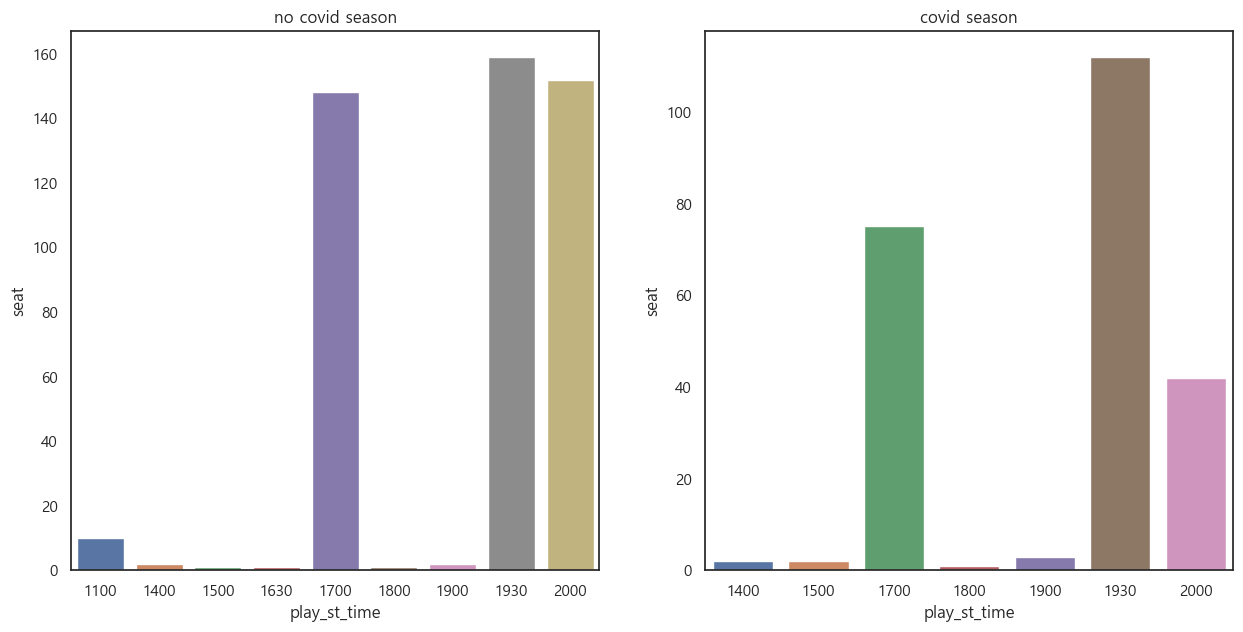

In [429]:
#covid 시즌 별 시간대별 공연수

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

sns.barplot(x = cthall_nc_group_time_pf.groupby('play_st_time').count().index,\
            y = cthall_nc_group_time_pf.groupby('play_st_time').count()['seat']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_time_pf.groupby('play_st_time').count().index,\
            y = cthall_c_group_time_pf.groupby('play_st_time').count()['seat']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

In [430]:
cthall_nc_group_genre_pf = cthall_no_covid.groupby(['genre','performance_code'],as_index=False).count()
cthall_c_group_genre_pf= cthall_covid.groupby(['genre','performance_code'],as_index=False).count()

Text(0.5, 1.0, 'covid season')

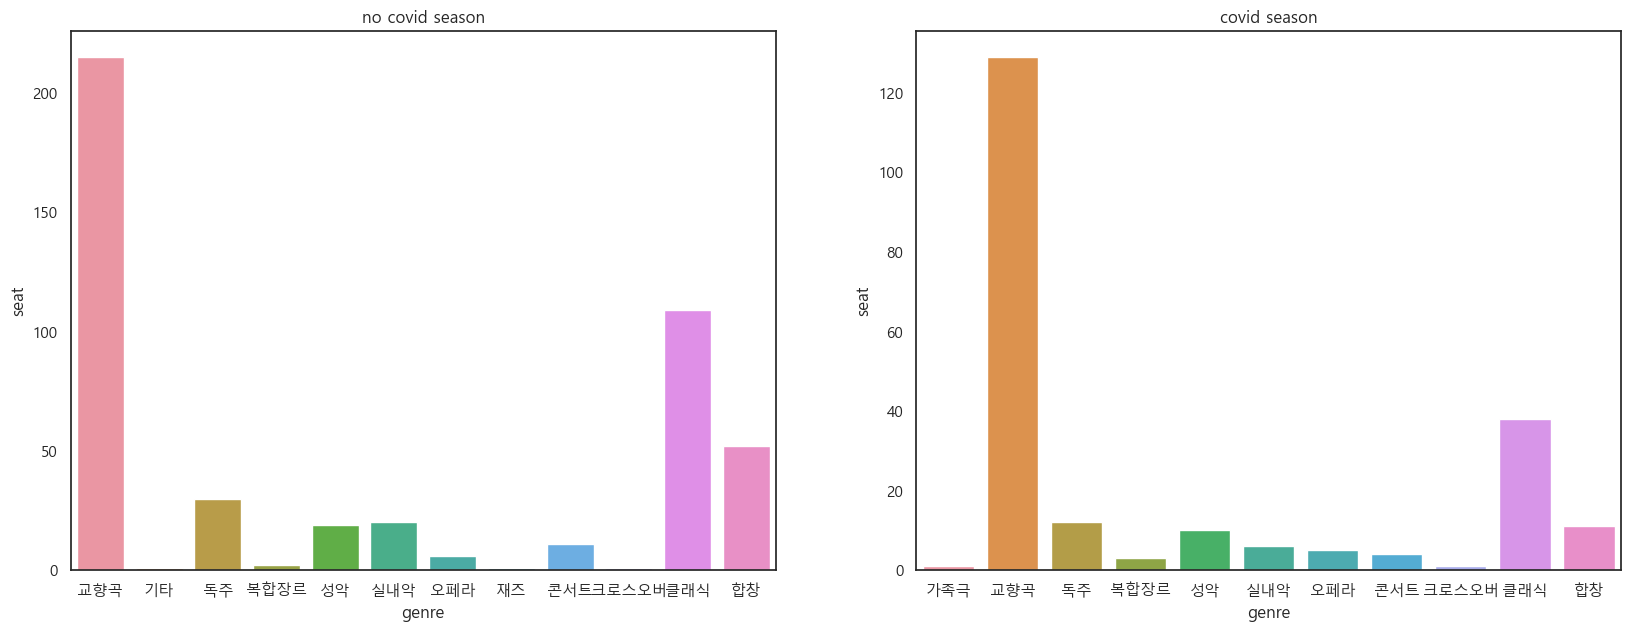

In [431]:
#covid 장르별 공연수

fig, ax = plt.subplots(ncols=2, figsize=(20, 7))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_genre_pf.groupby('genre').count().index,\
            y = cthall_nc_group_genre_pf.groupby('genre').count()['seat']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_genre_pf.groupby('genre').count().index,\
            y = cthall_c_group_genre_pf.groupby('genre').count()['seat']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

Text(0.5, 1.0, 'covid season')

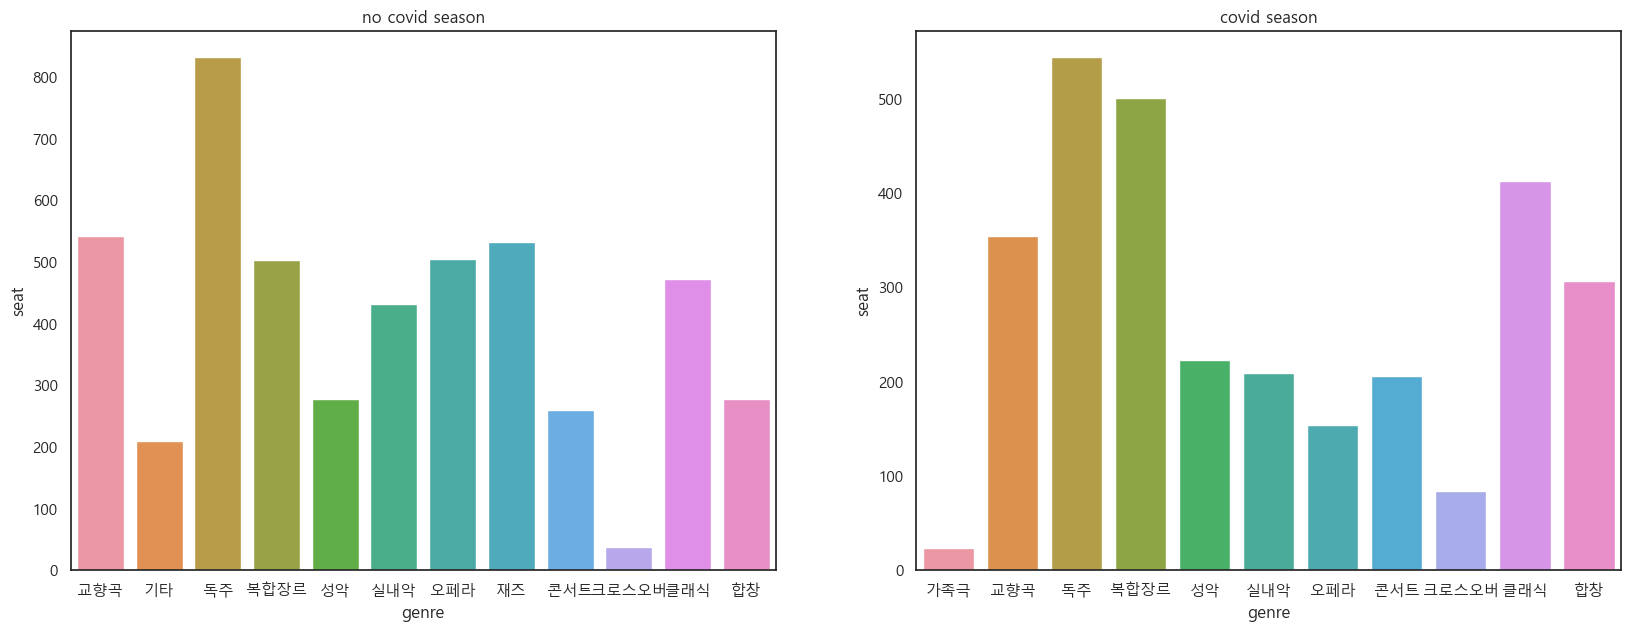

In [432]:
#covid 장르별 관객수

fig, ax = plt.subplots(ncols=2, figsize=(20, 7))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_genre_pf.groupby('genre').mean().index,\
            y = cthall_nc_group_genre_pf.groupby('genre').mean()['seat']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_genre_pf.groupby('genre').mean().index,\
            y = cthall_c_group_genre_pf.groupby('genre').mean()['seat']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

In [433]:
cthall_nc_group_genre_pf_mean = cthall_no_covid.groupby(['genre','performance_code'],as_index=False).mean('ori_price')
cthall_c_group_genre_pf_mean= cthall_covid.groupby(['genre','performance_code'],as_index=False).mean('ori_price')

Text(0.5, 1.0, 'covid season')

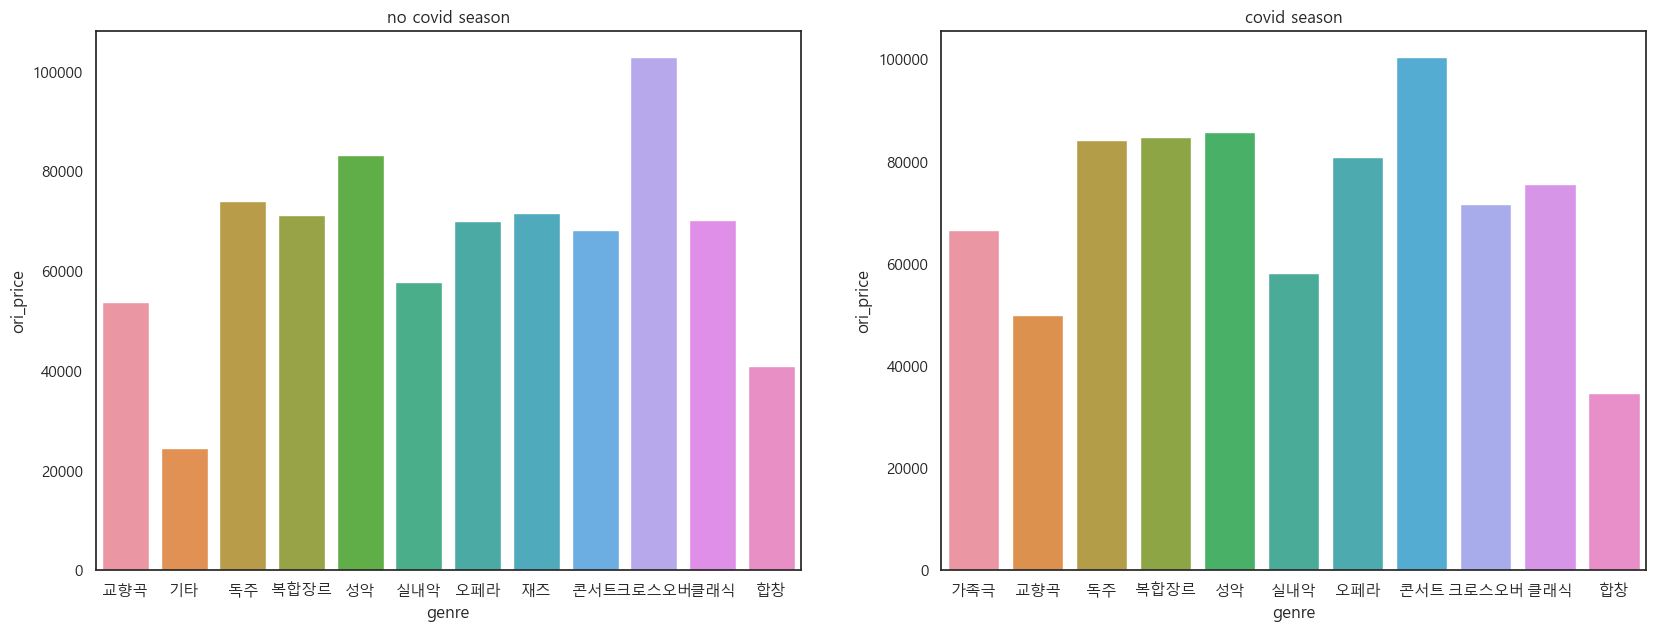

In [434]:
#covid 장르별 가격

fig, ax = plt.subplots(ncols=2, figsize=(20, 7))


plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_genre_pf_mean.groupby('genre').mean('ori_price').index,\
            y = cthall_nc_group_genre_pf_mean.groupby('genre').mean()['ori_price']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_genre_pf_mean.groupby('genre').mean('ori_price').index,\
            y = cthall_c_group_genre_pf_mean.groupby('genre').mean()['ori_price']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

In [435]:
cthall_no_covid['play_date'] = pd.to_datetime(cthall_no_covid['play_date'], format='%Y%m%d', errors='raise')
cthall_covid['play_date'] = pd.to_datetime(cthall_covid['play_date'], format='%Y%m%d', errors='raise')

In [436]:
cthall_no_covid['play_date_year'] = cthall_no_covid['play_date'].dt.year
cthall_no_covid['play_date_month'] = cthall_no_covid['play_date'].dt.month
cthall_no_covid['play_date_day'] = cthall_no_covid['play_date'].dt.day

cthall_covid['play_date_year'] = cthall_covid['play_date'].dt.year
cthall_covid['play_date_month'] = cthall_covid['play_date'].dt.month
cthall_covid['play_date_day'] = cthall_covid['play_date'].dt.day

In [437]:
cthall_nc_group_pdy_pf = cthall_no_covid.groupby(['play_date_year','performance_code'],as_index=False).count()
cthall_c_group_pdy_pf = cthall_covid.groupby(['play_date_year','performance_code'],as_index=False).count()

cthall_nc_group_pdm_pf = cthall_no_covid.groupby(['play_date_month','performance_code'],as_index=False).count()
cthall_c_group_pdm_pf = cthall_covid.groupby(['play_date_month','performance_code'],as_index=False).count()

Text(0.5, 1.0, 'covid season')

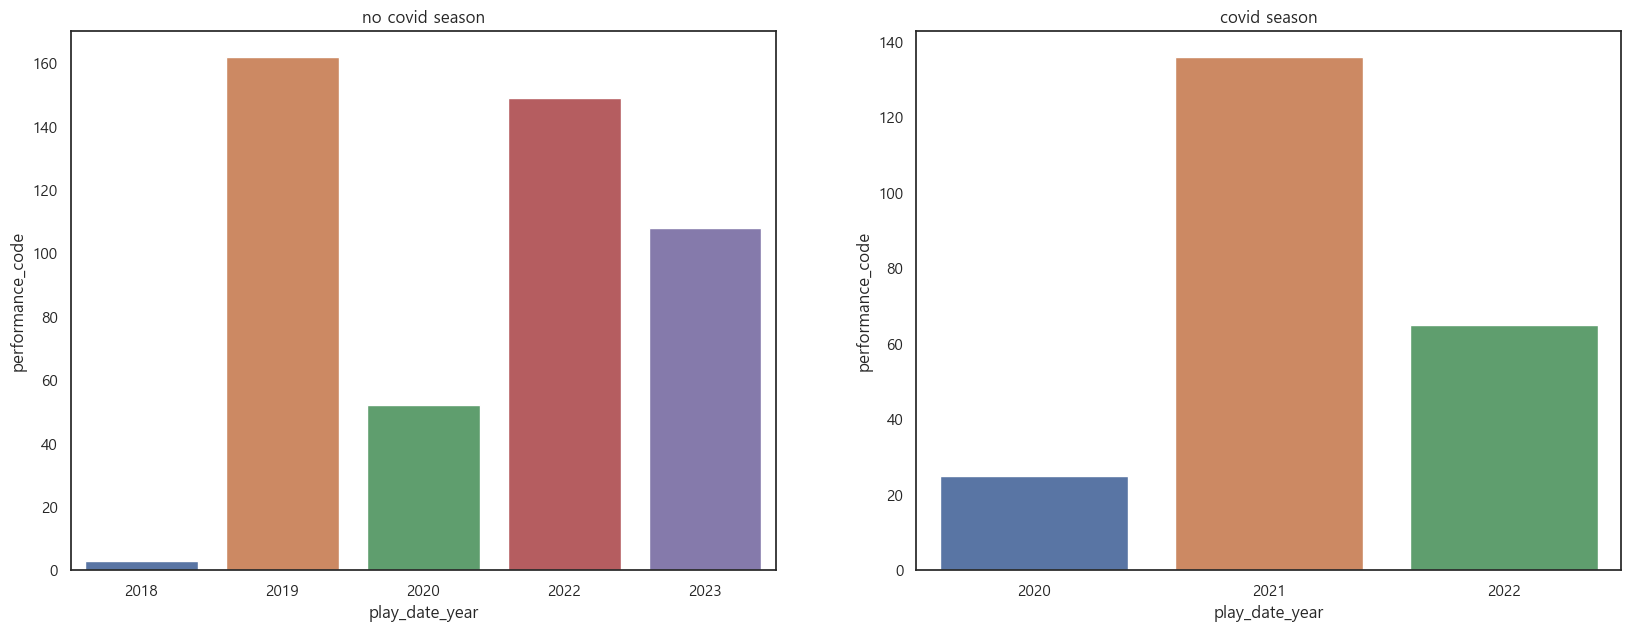

In [438]:
#covid 시즌, 연도별 공연수

fig, ax = plt.subplots(ncols=2, figsize=(20, 7))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_pdy_pf.groupby('play_date_year').count().index,\
            y = cthall_nc_group_pdy_pf.groupby('play_date_year').count()['performance_code']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_pdy_pf.groupby('play_date_year').count().index,\
            y = cthall_c_group_pdy_pf.groupby('play_date_year').count()['performance_code']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

Text(0.5, 1.0, 'covid season')

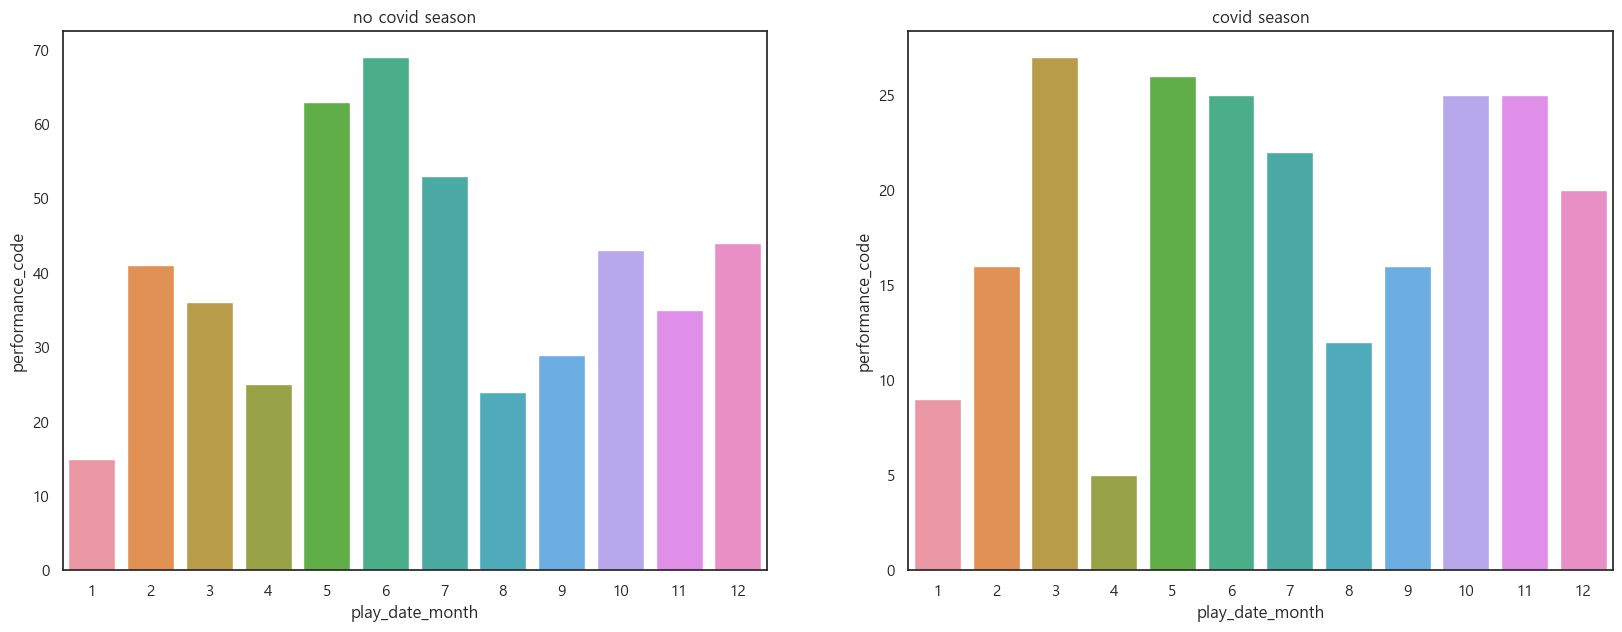

In [439]:
#covid 시즌, 월별 공연수

fig, ax = plt.subplots(ncols=2, figsize=(20, 7))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_pdm_pf.groupby('play_date_month').count().index,\
            y = cthall_nc_group_pdm_pf.groupby('play_date_month').count()['performance_code']\
            , ax=ax[0]   )

sns.barplot(x = cthall_c_group_pdm_pf.groupby('play_date_month').count().index,\
            y = cthall_c_group_pdm_pf.groupby('play_date_month').count()['performance_code']\
            , ax=ax[1])

ax[0].set_title("no covid season")
ax[1].set_title("covid season")

In [440]:
cthall_nc_group_pdy_pf_mean = cthall_no_covid.groupby(['play_date_month','performance_code'],as_index=False).mean('ori_price')
cthall_c_group_pdy_pf_mean = cthall_covid.groupby(['play_date_month','performance_code'],as_index=False).mean('ori_price')

cthall_nc_group_pdm_pf_mean = cthall_no_covid.groupby(['play_date_month','performance_code'],as_index=False).mean('ori_price')
cthall_c_group_pdm_pf_mean = cthall_covid.groupby(['play_date_month','performance_code'],as_index=False).mean('ori_price')

Text(0.5, 1.0, 'covid season')

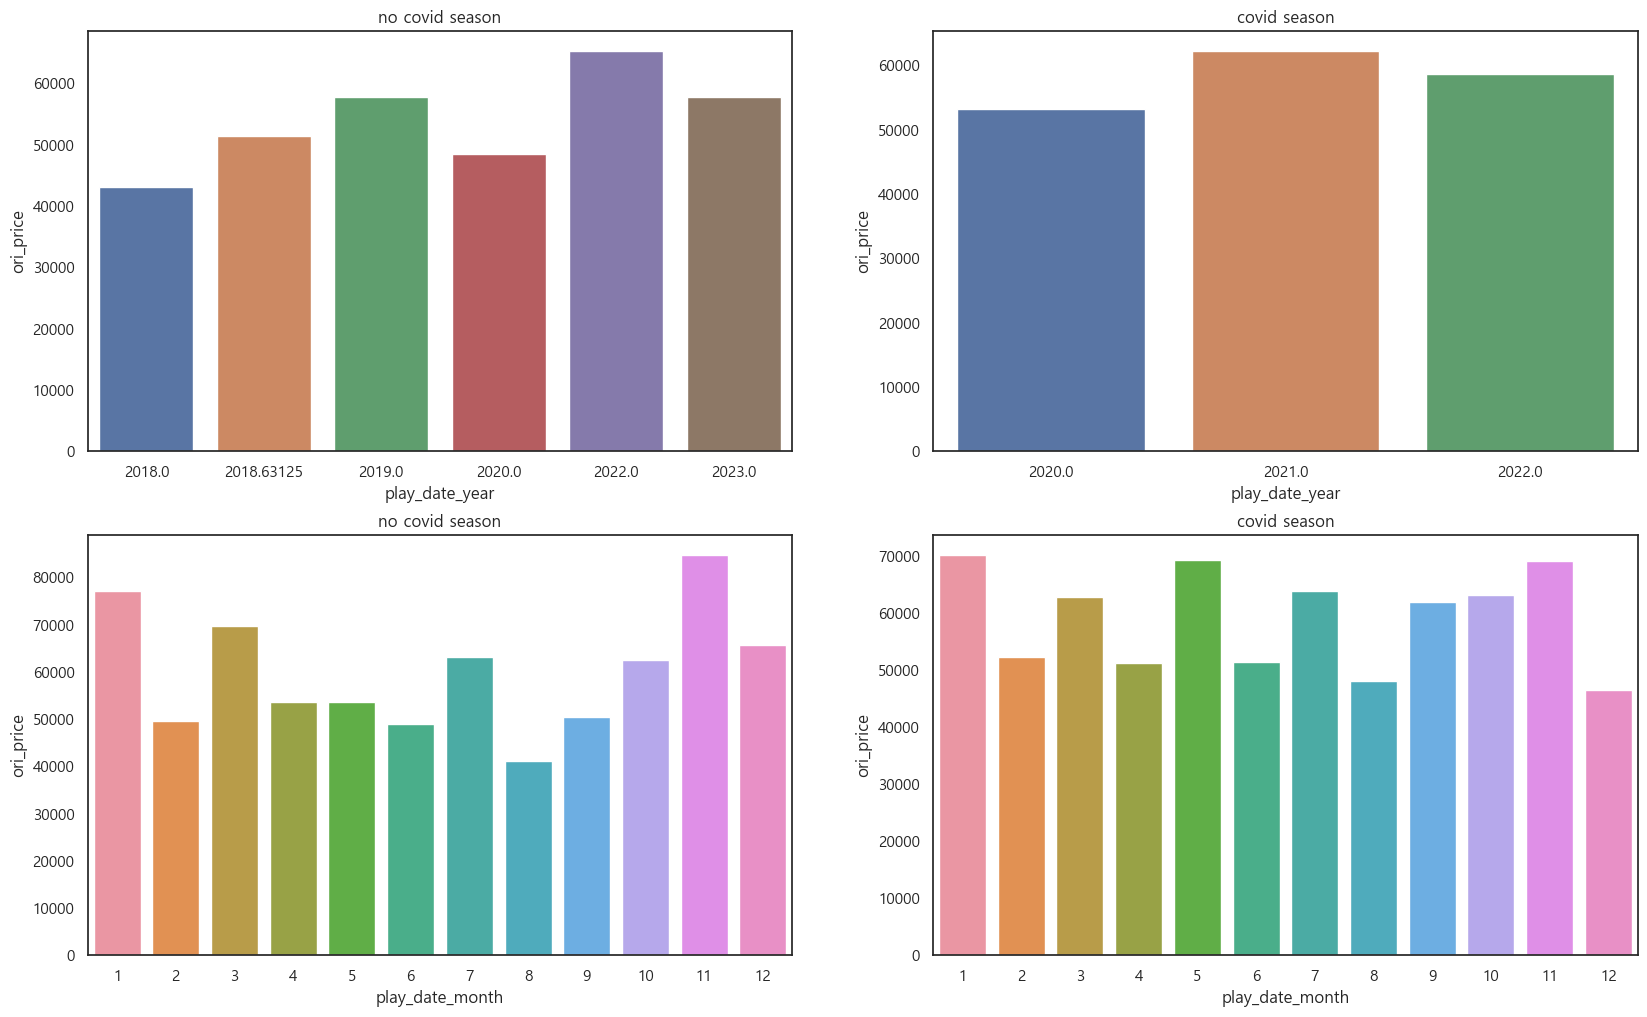

In [441]:
#covid 시즌, 연도별,월별 평균가격

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price').index ,\
            y = cthall_nc_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price')['ori_price']\
            , ax=ax[0,0]   )

sns.barplot(x = cthall_c_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price').index ,\
            y = cthall_c_group_pdy_pf_mean.groupby('play_date_year').mean('ori_price')['ori_price']\
            , ax=ax[0,1])

sns.barplot(x = cthall_nc_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price').index ,\
            y = cthall_nc_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price')['ori_price']\
            , ax=ax[1,0]   )

sns.barplot(x = cthall_c_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price').index ,\
            y = cthall_c_group_pdm_pf_mean.groupby('play_date_month').mean('ori_price')['ori_price']\
            , ax=ax[1,1])

ax[0,0].set_title("no covid season")
ax[0,1].set_title("covid season")

ax[1,0].set_title("no covid season")
ax[1,1].set_title("covid season")


In [442]:
cthall_nc_group_pdy_pf_aud = cthall_no_covid.groupby('play_date_year',as_index=False).count()
cthall_c_group_pdy_pf_aud = cthall_covid.groupby('play_date_year',as_index=False).count()

cthall_nc_group_pdm_pf_aud = cthall_no_covid.groupby('play_date_month',as_index=False).count()
cthall_c_group_pdm_pf_aud = cthall_covid.groupby('play_date_month',as_index=False).count()

Text(0.5, 1.0, 'no covid season')

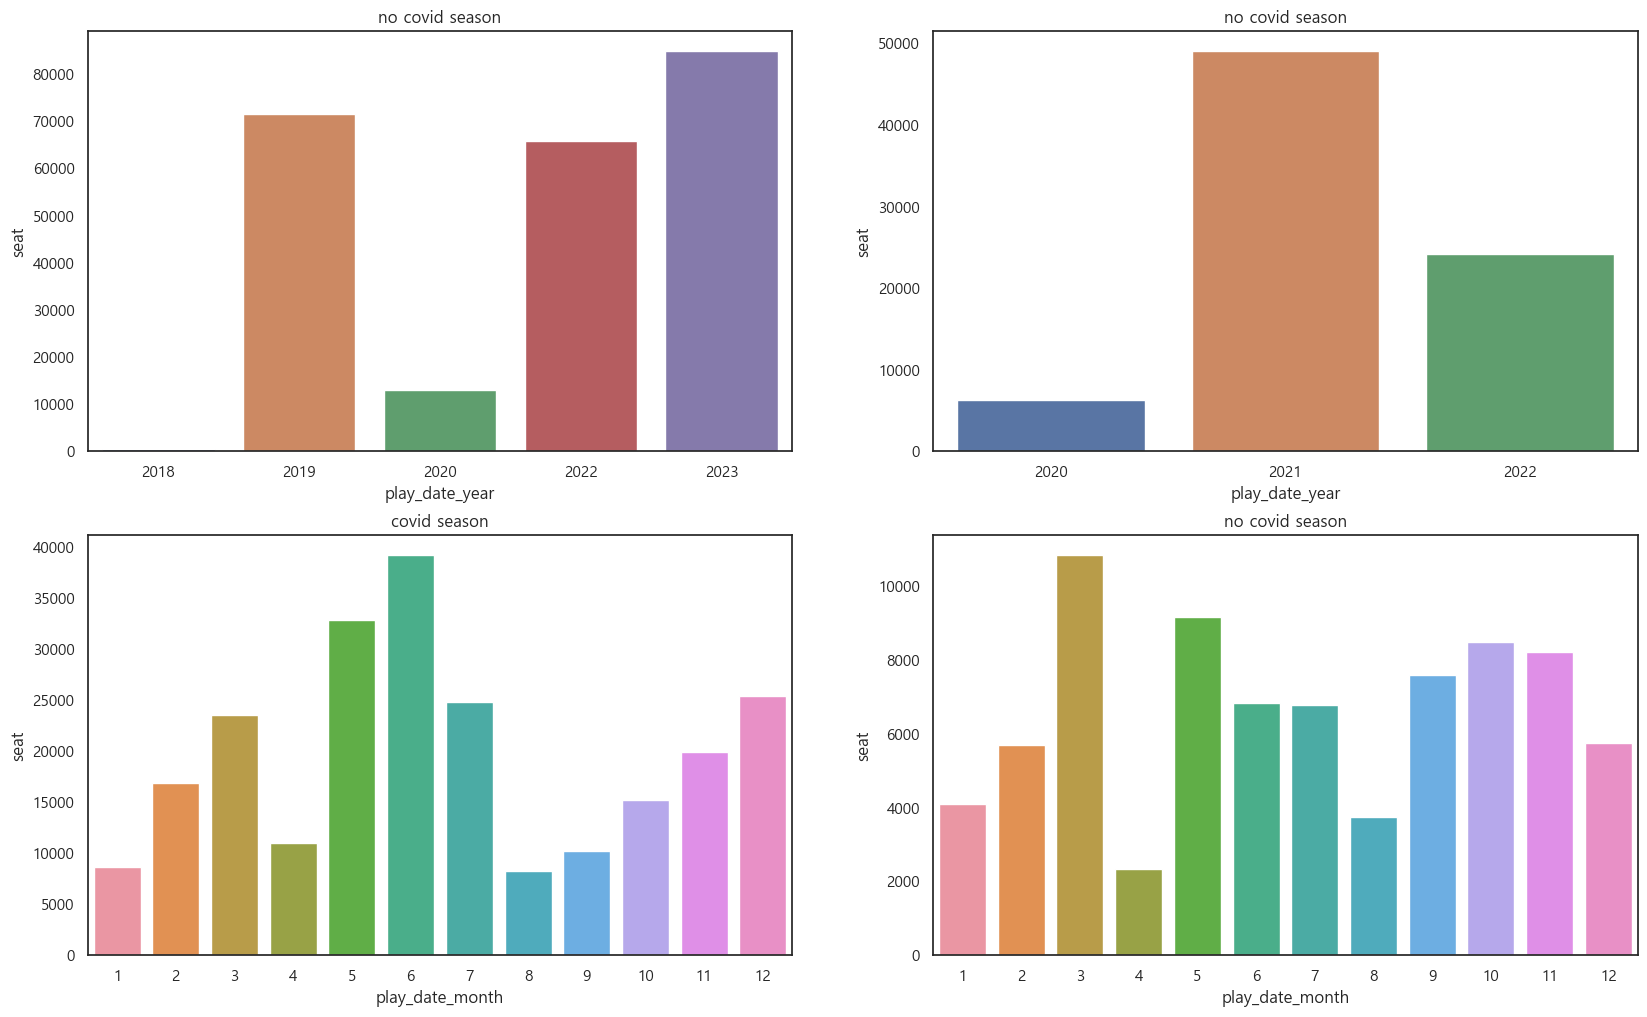

In [443]:
#covid 시즌, 연도별,월별 평균관객수

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

sns.barplot(x = cthall_nc_group_pdy_pf_aud['play_date_year'] ,\
            y = cthall_nc_group_pdy_pf_aud['seat']\
            , ax=ax[0,0]   )

sns.barplot(x = cthall_c_group_pdy_pf_aud['play_date_year'] ,\
            y = cthall_c_group_pdy_pf_aud['seat']\
            , ax=ax[0,1])

sns.barplot(x = cthall_nc_group_pdm_pf_aud['play_date_month'] ,\
            y = cthall_nc_group_pdm_pf_aud['seat']\
            , ax=ax[1,0]   )

sns.barplot(x = cthall_c_group_pdm_pf_aud['play_date_month'] ,\
            y = cthall_c_group_pdm_pf_aud['seat']\
            , ax=ax[1,1])

ax[0,0].set_title("no covid season")
ax[0,1].set_title("no covid season")

ax[1,0].set_title("covid season")
ax[1,1].set_title("no covid season")


---
# Insight 도출 시각화

In [444]:
cthall_group_time_pf_df = cthall_group_time_pf.groupby('play_st_time').count()
cthall_group_time_pf_df

,performance_code,tran_date,tran_time,play_date,seat,price,pre_open_date,open_date,genre,running_time,member_yn,floor,zone,col,ori_price,covid_sep
play_st_time,,,,,,,,,,,,,,,,
1100,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1400,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1500,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1630,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1700,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209
1800,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1900,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1930,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
2000,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181


In [369]:
import plotly.express as px

fig = px.pie(cthall_group_time_pf_df, values='performance_code', names= cthall_group_time_pf_df.index, title='시간대 별 공연 수', width=500, height=500\
             , color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.update_traces(textposition='inside', textinfo='label+percent')
fig.show()

In [445]:
import plotly.express as px

# 데이터프레임에서 가장 큰 값을 가지는 행을 찾습니다.
largest_index = cthall_group_time_pf_df['performance_code'].idxmax()
largest_value = cthall_group_time_pf_df['performance_code'].max()

# 파이 그래프 생성
fig = px.pie(cthall_group_time_pf_df, values='performance_code', names=cthall_group_time_pf_df.index,
             title='시간대 별 공연 수', width=500, height=500, color_discrete_sequence=px.colors.sequential.RdBu_r)

fig.update_layout( title_x = 0.5 )
# 가장 큰 값에 해당하는 파이를 크게 만듭니다.
# fig.update_traces(textposition='inside', textinfo='label+percent')
fig.update_traces(textposition='inside', textinfo='label+percent',pull=[0.1 if idx != largest_index else 0.3 for idx in range(len(cthall_group_time_pf_df))])

fig.show()

In [446]:
cthall_group_pdm_pf_aud['play_date_month'] = cthall_group_pdm_pf_aud['play_date_month'].astype('str')
cthall_nc_group_pdm_pf_aud['play_date_month'] = cthall_nc_group_pdm_pf_aud['play_date_month'].astype('str')
cthall_c_group_pdm_pf_aud['play_date_month'] = cthall_c_group_pdm_pf_aud['play_date_month'].astype('str')

In [447]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x= cthall_group_pdm_pf_aud['play_date_month'] ,
    y= cthall_group_pdm_pf_aud['seat'] ,
    marker_color=colors_nc,

))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.

fig.update_layout(barmode='group', xaxis_tickangle=0)

fig.update_layout(
    {
        "title": {
            "text": "<b>월 별 관객 수 비교</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "월",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "관객수",
            "tickfont": {
                "size": 10 ,               
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1200,
        "height":600
    }
)

fig.show()


----

In [448]:
cthall_unique = df_copy[ df_copy['place'] == '콘서트홀' ]
cthall_unique # concerthall 에서 한 공연만 가지고 dataframe 생성

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
5,30.0,F,블루,무료,NaN,NaN,NaN,NaN,20181124,1145,...,2,블루회원 할인20%,528,20181119.0,20181119.0,교향곡,콘서트홀,100,15,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920853,60.0,F,무료,그린,NaN,NaN,NaN,NaN,20210618,1509,...,2,일반,887,20210618.0,20210620.0,교향곡,콘서트홀,110,20,Y
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [472]:
cthall_unique

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,genre,place,running_time,intermission,member_yn,floor,zone,col,discount,ori_price
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,2022-02-06,1615,...,독주,콘서트홀,90,0,Y,1층,B블록,12열,-10,163636.363636
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-20,1459,...,교향곡,콘서트홀,100,15,N,3층,E블록,4열,-10,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-13,954,...,교향곡,콘서트홀,120,20,N,2층,D블록,8열,-10,0.000000
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,2019-07-03,908,...,클래식,콘서트홀,100,15,N,1층,C블록,17열,-10,68181.818182
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,2019-10-05,1417,...,오페라,콘서트홀,120,15,Y,3층,BOX,9,20,30000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03,1659,...,클래식,콘서트홀,120,15,N,합창석,G블록,4열,-10,0.000000
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,2023-05-22,1729,...,교향곡,콘서트홀,120,15,Y,3층,A블록,6열,-10,9090.909091
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-09,1652,...,클래식,콘서트홀,120,15,N,1층,D블록,16열,-10,0.000000
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-26,1655,...,합창,콘서트홀,110,15,N,1층,D블록,20열,-10,0.000000


In [473]:
cthall_unique.groupby('age',as_index=False).agg({'ori_price':'mean',
                                         'seat':'count'})

,age,ori_price,seat
0,10.0,67053.452179,2499
1,20.0,57346.689465,38024
2,30.0,74819.385591,50257
3,40.0,74703.755447,64192
4,50.0,72459.919821,68895
5,60.0,68153.269239,48490
6,70.0,67270.933534,14035
7,80.0,90322.689642,3306


In [474]:
df_age_cnt = cthall_unique.groupby('age',as_index=False).agg({'ori_price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_age_cnt.reset_index(drop=True,inplace=True)
df_age_cnt['age'] = df_age_cnt['age'].astype('str')

In [475]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

colors = ['#03588C',] * 8
colors[0] = '#F24472'
colors[1] = '#F24472'
# colors[2] = '#FF66CC'

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['seat'], text=df_age_cnt['seat'], textposition='auto',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Customer_Count</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Count",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)


In [476]:
df_age_cnt = cthall_unique.groupby('age',as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_age_cnt.reset_index(drop=True,inplace=True)
df_age_cnt['age'] = df_age_cnt['age'].astype('str')

In [477]:
df_age_cnt = df_age_cnt.sort_values('price',ascending=False)
df_age_cnt['price'] = df_age_cnt['price'].astype('int')

In [478]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 8
colors[0] = '#F24472'
colors[1] = '#F24472'
#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['price'], text=df_age_cnt['price'], textposition='auto',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":900,
        "height":500
    }
)


In [479]:
df_age_cnt = cthall_unique.groupby('age',as_index=False).agg({'ori_price':'sum',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_age_cnt.reset_index(drop=True,inplace=True)
df_age_cnt['age'] = df_age_cnt['age'].astype('str')

In [480]:
pd.options.display.float_format = '{:.1f}'.format

In [482]:
df_age_cnt = df_age_cnt.sort_values('ori_price',ascending=False)
# df_age_cnt['price'] = df_age_cnt['price'].astype('int')

In [483]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])


#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['ori_price'], text=df_age_cnt['ori_price'], textposition='auto',marker_color = colors,texttemplate='%{text:.0f}'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Sum</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":900,
        "height":500
    }
)


In [485]:
df_gender_cnt = cthall_unique.groupby('gender',as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=False)

,gender,price,seat
0,F,64885.4,182178
1,M,58060.2,107833


In [486]:
import pandas as pd

# 원그래프
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
	go.Pie(
		labels=df_gender_cnt['gender'], values=df_gender_cnt['seat'],hole=.4,textinfo='label+percent',textfont_size=20
	)
)


fig.update_layout(
    {
        "title": {
            "text": "The rate of Customer Count",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 18
            }
        },
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    },


fig.update_layout(
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)],
)
)
fig.show()

In [487]:
pd.options.display.float_format = '{:.1f}'.format
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 2
colors[0] = '#F24472'
# colors[1] = '#F24472'


#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_gender_cnt['gender'], y=df_gender_cnt['price'], text=df_gender_cnt['price'], textposition='auto',texttemplate='%{text:.0f}',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Gender_Price_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    }
)


In [491]:
df_gender_cnt = cthall_unique.groupby('gender',as_index=False).agg({'price':'sum',
                                         'seat':'count'}).sort_values('price',ascending=False)
df_gender_cnt

,gender,price,seat
0,F,11820687000,182178
1,M,6260805000,107833


In [492]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 2
colors[0] = '#F24472'

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_gender_cnt['gender'], y=df_gender_cnt['price'], text=df_gender_cnt['price'], textposition='auto',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Gender_Price_Sum</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    }
)


In [494]:
df_age_gender_coount = cthall_unique.groupby(['age','gender'],as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=True)
df_age_gender_coount['age_gender'] = df_age_gender_coount['age'].astype('str') + df_age_gender_coount['gender']

In [495]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 16
colors[-1] = '#F24472'
colors[-2] = '#F24472'
colors[-3] = '#F24472'


#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['seat'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['seat'], textposition='auto',orientation='h',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Customer_Count</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Count",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [496]:
df_age_gender_coount = df_age_gender_coount.sort_values('price',ascending=True)

In [497]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 16
colors[-1] = '#F24472'
colors[-2] = '#F24472'
colors[-3] = '#F24472'
#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['price'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['price'], textposition='auto',orientation='h',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Prcie_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Price",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [499]:
df_age_gender_coount = cthall_unique.groupby(['age','gender'],as_index=False).agg({'price':'sum',
                                         'seat':'count'}).sort_values('price',ascending=True)
df_age_gender_coount['age_gender'] = df_age_gender_coount['age'].astype('str') + df_age_gender_coount['gender']

In [500]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 16
colors[-1] = '#F24472'
colors[-2] = '#F24472'
colors[-3] = '#F24472'
#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['price'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['price'], textposition='auto',orientation='h',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Prcie_Sum</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Price",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [501]:
cthall_df = cthall_unique.copy()
cthall_df['member_score'] = 0
cthall_df.loc[cthall_df['member_yn']=='Y','member_score'] = 1
df_age_gender_coount = cthall_df.groupby(['age','gender'],as_index=False).agg({'price':'sum',
                                         'seat':'count',
                                                                              'member_score':'sum'}).sort_values('member_score',ascending=True)
df_age_gender_coount['age_gender'] = df_age_gender_coount['age'].astype('str') + df_age_gender_coount['gender']

In [502]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
colors = ['#03588C',] * 16
colors[-1] = '#F24472'
colors[-2] = '#F24472'
colors[-3] = '#F24472'


#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['member_score'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['price'], textposition='auto',orientation='h',marker_color = colors
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Membership_Count</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Count",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [503]:
nocovid = cthall[(cthall['play_date'] > 20220415) | (cthall['play_date'] <= 20200229)]

In [504]:
df_isnull = nocovid[(nocovid.pre_open_date.isnull())&(nocovid['price']!=0)]   # 선예매 Y
df_notnull = nocovid[(nocovid.pre_open_date.notnull())&(nocovid['price']!=0)] # 선예매 N

In [505]:
df_notnull_price = df_notnull.groupby(['genre','member_yn'],as_index=False)[['price']].mean()
df_isnull_price = df_isnull.groupby(['genre','member_yn'],as_index=False)[['price']].mean()

In [507]:
colors1 = ['#03588C',] * len(df_notnull_price.index)
colors2 = ['#F24472',] * len(df_notnull_price.index)

In [508]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_notnull_price[df_notnull_price['member_yn'] == 'N']['genre'],
    y=df_notnull_price[df_notnull_price['member_yn'] == 'N']['price'],
    name='Non-Members',
    marker_color=colors1
))

fig.add_trace(go.Bar(
    x=df_notnull_price[df_notnull_price['member_yn'] == 'Y']['genre'],
    y=df_notnull_price[df_notnull_price['member_yn'] == 'Y']['price'],
    name='Members',
    marker_color=colors2
))

fig.update_layout(
    {
        "title": {
            "text": "<b>Average price of genre by membership without pre-booking</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 16
            }
        },
        "xaxis": {
            "title": "genre",
            "showticklabels":True,
            "dtick": "M1",
            "tickfont": {
                "size": 8               
            }
        },
        "yaxis": {
            "title": "Average price"
        },
        "template":'plotly_white'
    }
)

fig.show()

In [509]:
import plotly.graph_objects as go

# Create a grouped bar chart
fig = go.Figure()

# Add the first group of bars
fig.add_trace(go.Bar(
    x=df_isnull_price[df_isnull_price['member_yn'] == 'N']['genre'],
    y=df_isnull_price[df_isnull_price['member_yn'] == 'N']['price'],
    name='Non-Members',
    marker_color=colors1
))

# Add the second group of bars
fig.add_trace(go.Bar(
    x=df_isnull_price[df_isnull_price['member_yn'] == 'Y']['genre'],
    y=df_isnull_price[df_isnull_price['member_yn'] == 'Y']['price'],
    name='Members',
    marker_color=colors2
))

# Update the layout for grouped bars
fig.update_layout(
    {
        "title": {
            "text": "<b>The average price of each genre with pre-booking</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 18
            }
        },
        "xaxis": {
            "title": "genre",
            "showticklabels":True,
            "dtick": "M1",
            "tickfont": {
                "size": 8               
            }
        },
        "yaxis": {
            "title": "Average price"
        },
        "template":'plotly_white'
    }
)

# Show the figure
fig.show()